## 1. Exploratory Data Analysis

### Distribution of Popularity Against Score

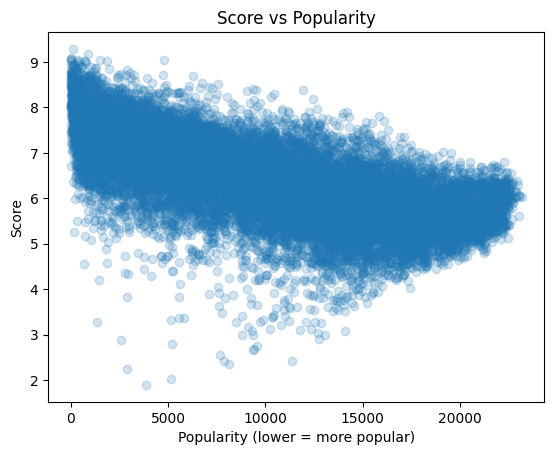

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

anime = pd.read_csv("../data/processed/anime.csv")

plt.scatter(anime["popularity"], anime["score"], alpha=0.2)
plt.xlabel("Popularity (lower = more popular)")
plt.ylabel("Score")
plt.title("Score vs Popularity")
plt.show()

1️⃣ Dataset size & completeness

Total anime count

% missing synopsis, score, year

2️⃣ Genre distribution

Top 15 genres

Long-tail genres

3️⃣ Score vs popularity

Scatter plot

Insight: high-score ≠ high-popularity

4️⃣ Implicit signal justification

Explain:

Why popularity & favorites approximate engagement

Why content-based is prioritized

In [2]:
no_of_entries = anime["anime_id"].count()

print(f"There are {no_of_entries} anime in this dataset.")

There are 29472 anime in this dataset.


In [3]:
for column in anime.columns:
    percent_missing = anime[column].isna().mean()
    if percent_missing > 0:
        print(f"The {column.upper()} column has {percent_missing * 100:.2f}% of its values missing\n")
        
print(anime.isna().mean().sort_values(ascending=False))

The SYNOPSIS column has 17.43% of its values missing

The YEAR column has 78.50% of its values missing

The TYPE column has 0.24% of its values missing

The RATING column has 2.04% of its values missing

The EPISODES column has 2.68% of its values missing

The SCORE column has 34.96% of its values missing

The RANK column has 24.51% of its values missing

The STUDIO_ID column has 40.04% of its values missing

year                  0.784982
studio_id             0.400380
score                 0.349620
rank                  0.245148
synopsis              0.174301
episodes              0.026839
rating                0.020392
type                  0.002409
anime_id              0.000000
title                 0.000000
alternative_titles    0.000000
popularity            0.000000
members               0.000000
favorites             0.000000
dtype: float64


### Things to note:
- There are 29472 rows
- Popularity is always present
- Almost 80% of year data is missing (6337/29472 non-NA values)

### Distribution of Popularity Against Rank

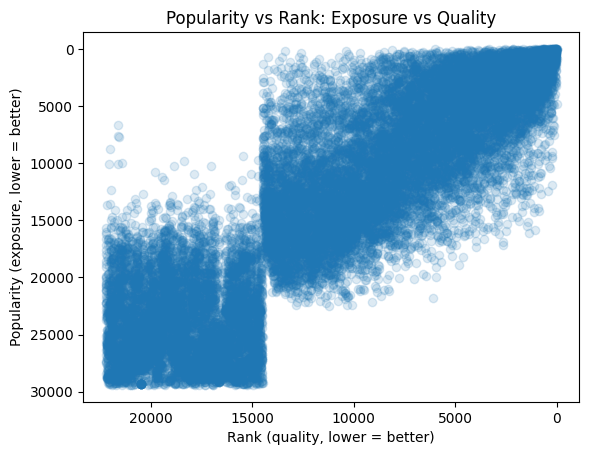

In [8]:
plt.scatter(anime["rank"], anime["popularity"], alpha=0.15)
plt.xlabel("Rank (quality, lower = better)")
plt.ylabel("Popularity (exposure, lower = better)")
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title("Popularity vs Rank: Exposure vs Quality")
plt.show()

<h4>What the plot shows</h4>

- A broad, triangular / wedge-shaped distribution.

- Clear but imperfect correlation:

- Highly ranked (high-quality) anime tend to be popular, but with large variance.

- Many mid- to low-ranked anime are still very popular.

- Some highly ranked anime remain relatively niche.

<h4>Key structural patterns</h4>

🔵 Top-right (high quality, high exposure)

- Canonical classics and hits

- These dominate mainstream recommendations

- Safe but non-diverse suggestions

🟡 Top-left (high exposure, lower quality)

- Widely watched but less critically rated titles

- Examples: long-running shounen, seasonal hype shows

- Indicates popularity ≠ quality

🟣 Bottom-right (high quality, low exposure)

- Critically strong but niche anime

- Under-discovered content

- Highest value region for recommendations

⚫ Bottom-left (low quality, low exposure)

- Long-tail noise

- Should be de-prioritized

<h4>Interpretation</h4>

- Rank and popularity are correlated but not redundant

- Treating popularity as a proxy for "likelihood of being liked" would bias recommendations toward mainstream content.

- Treating rank alone would over-recommend niche, critically acclaimed titles.

<h4>Conclusion</h4>

After axis normalization, the popularity-rank plot shows a noisy positive correlation, with a large set of high-quality but low-exposure titles. This supports a recommendation strategy that uses rank as a quality prior and popularity as an exposure regularizer, enabling discovery without collapsing into purely mainstream recommendations.

### Distribution of Rank Against Score

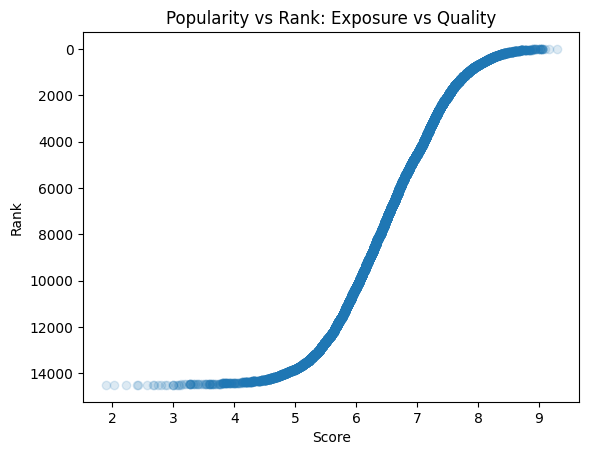

In [ ]:
plt.scatter(anime["score"], anime["rank"], alpha=0.15)
plt.xlabel("Score")
plt.ylabel("Rank")
plt.title("Rank vs Score")
plt.gca().invert_yaxis()
plt.show()

<h4> What the plot shows</h4>

- A near-monotonic, S-shaped relationship between score and rank.

- As score increases, rank improves (moves toward 1).

- Compression at the extremes:
    - Many anime cluster at mid scores (6-7) but span a wide range of ranks.

    - Very high scores (>8.5) produce diminishing improvements in rank.

<h4> Interpretation </h4>

- Rank is a derived, ordinal transformation of score, adjusted for vote counts and confidence.

- Score explains rank extremely well, but rank adds stability by penalizing low-sample or noisy scores.

<h4>Conclusion:</h4>

- Rank is a quality prior, not an independent signal.

- In modeling:

    - Use rank OR score, not both as raw features.

    - Prefer rank when you want a conservative, quality-weighted signal.

In [15]:
anime_genres = pd.read_csv("../data/processed/anime_genres.csv")

genre_stats = (
    anime_genres
    .merge(anime, on="anime_id")
    .groupby("genre")
    .agg(
        median_rank=("rank", "median"),
        median_popularity=("popularity", "median"),
        count=("anime_id", "count")
    )
    .sort_values("count", ascending=False)
)

print(genre_stats)


               median_rank  median_popularity  count
genre                                               
Comedy              9643.5            11607.5   7930
Fantasy            10151.0            13358.0   6075
Action              6549.0             7773.5   4896
Adventure           8506.0            11663.0   4540
Sci-Fi              8514.5             9762.5   3522
Drama               6792.5             8003.0   3137
Romance             5374.0             5229.0   2254
Hentai                 NaN             9044.0   1611
Supernatural        6073.0             6709.0   1561
Slice of Life      10563.0            15200.0   1255
Avant Garde        14290.5            20183.0   1091
Mystery             4581.0             5613.0   1028
Ecchi               7337.0             4427.0    831
Sports              7762.0            10083.0    827
Horror              9809.0             9353.5    598
Suspense            3858.0             3145.5    462
Gourmet             8063.0            14589.5 

<h4>EDA conclusion</h4>
Certain genres (e.g., Mystery, Sports, Drama) skew high-quality but low-exposure (though usually not by much), ideal for discovery-focused recommendations.

The analysis confirms that rank (quality) and popularity (exposure) capture distinct dimensions of anime preference. Because user-level data is unavailable, the recommender system prioritizes content similarity while incorporating rank as a quality prior and popularity as an exposure bias to balance discovery and mainstream appeal.